In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving football_CLEAN.csv to football_CLEAN.csv


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "football_CLEAN.csv" with length 34648 bytes


In [ ]:
uploaded

{'football_CLEAN.csv': b"name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing\r\nAlexis Sanchez,Arsenal,28,LW,1,65,4329,12,17.10%,264,3,Chile,0,4,1,1,0\r\nMesut Ozil,Arsenal,28,AM,1,50,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0\r\nPetr Cech,Arsenal,35,GK,4,7,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0\r\nTheo Walcott,Arsenal,28,RW,1,20,2393,7.5,1.50%,122,1,England,0,4,1,1,0\r\nLaurent Koscielny,Arsenal,31,CB,3,22,912,6,0.70%,121,2,France,0,4,1,1,0\r\nHector Bellerin,Arsenal,22,RB,3,30,1675,6,13.70%,119,2,Spain,0,2,1,1,0\r\nOlivier Giroud,Arsenal,30,CF,1,22,2230,8.5,2.50%,116,2,France,0,4,1,1,0\r\nNacho Monreal,Arsenal,31,LB,3,13,555,5.5,4.70%,115,2,Spain,0,4,1,1,0\r\nShkodran Mustafi,Arsenal,25,CB,3,30,1877,5.5,4.00%,90,2,Germany,0,3,1,1,1\r\nAlex Iwobi,Arsenal,21,LW,1,10,1812,5.5,1.00%,89,4,Nigeria,0,1,1,1,0\r\nGranit Xhaka,Arsenal,24,DM,2,35,1815,5.5,2.00%,85,2,Switzerland,0,2,1,1,0\

In [ ]:
import io

In [ ]:
train= pd.read_csv(io.StringIO(uploaded['football_CLEAN.csv'].decode('utf-8')))
train.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0


In [ ]:
train['FPL_SEL'] = pd.to_numeric(train['fpl_sel'].str[:-1])
train.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3,Chile,0,4,1,1,0,17.1
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2,Germany,0,4,1,1,0,5.6
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2,Czech Republic,0,6,1,1,0,5.9
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1,England,0,4,1,1,0,1.5
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2,France,0,4,1,1,0,0.7


In [ ]:
train.drop(['fpl_sel'],axis=1,inplace=True)
train.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,264,3,Chile,0,4,1,1,0,17.1
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,167,2,Germany,0,4,1,1,0,5.6
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,134,2,Czech Republic,0,6,1,1,0,5.9
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,122,1,England,0,4,1,1,0,1.5
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,121,2,France,0,4,1,1,0,0.7


In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 50
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
df_mini=train.loc[:,['club','position_cat','market_value']]

In [ ]:
sns.set(font_scale=1.5)

In [ ]:
df_mini

,club,position_cat,market_value
0,Arsenal,1,65.0
1,Arsenal,1,50.0
2,Arsenal,4,7.0
3,Arsenal,1,20.0
4,Arsenal,3,22.0
...,...,...,...
456,West+Ham,2,5.0
457,West+Ham,3,7.0
458,West+Ham,3,4.5
459,West+Ham,1,1.0


In [ ]:
df_mini1=df_mini.groupby(['club','position_cat'])
df_mini2=df_mini1.mean()
df_mini2=df_mini2.reset_index()

In [ ]:
df_mini2

,club,position_cat,market_value
0,Arsenal,1,29.6250
1,Arsenal,2,21.0000
2,Arsenal,3,15.1000
3,Arsenal,4,5.0000
4,Bournemouth,1,6.3500
...,...,...,...
75,West+Brom,4,2.7500
76,West+Ham,1,11.5000
77,West+Ham,2,8.2500
78,West+Ham,3,7.3125


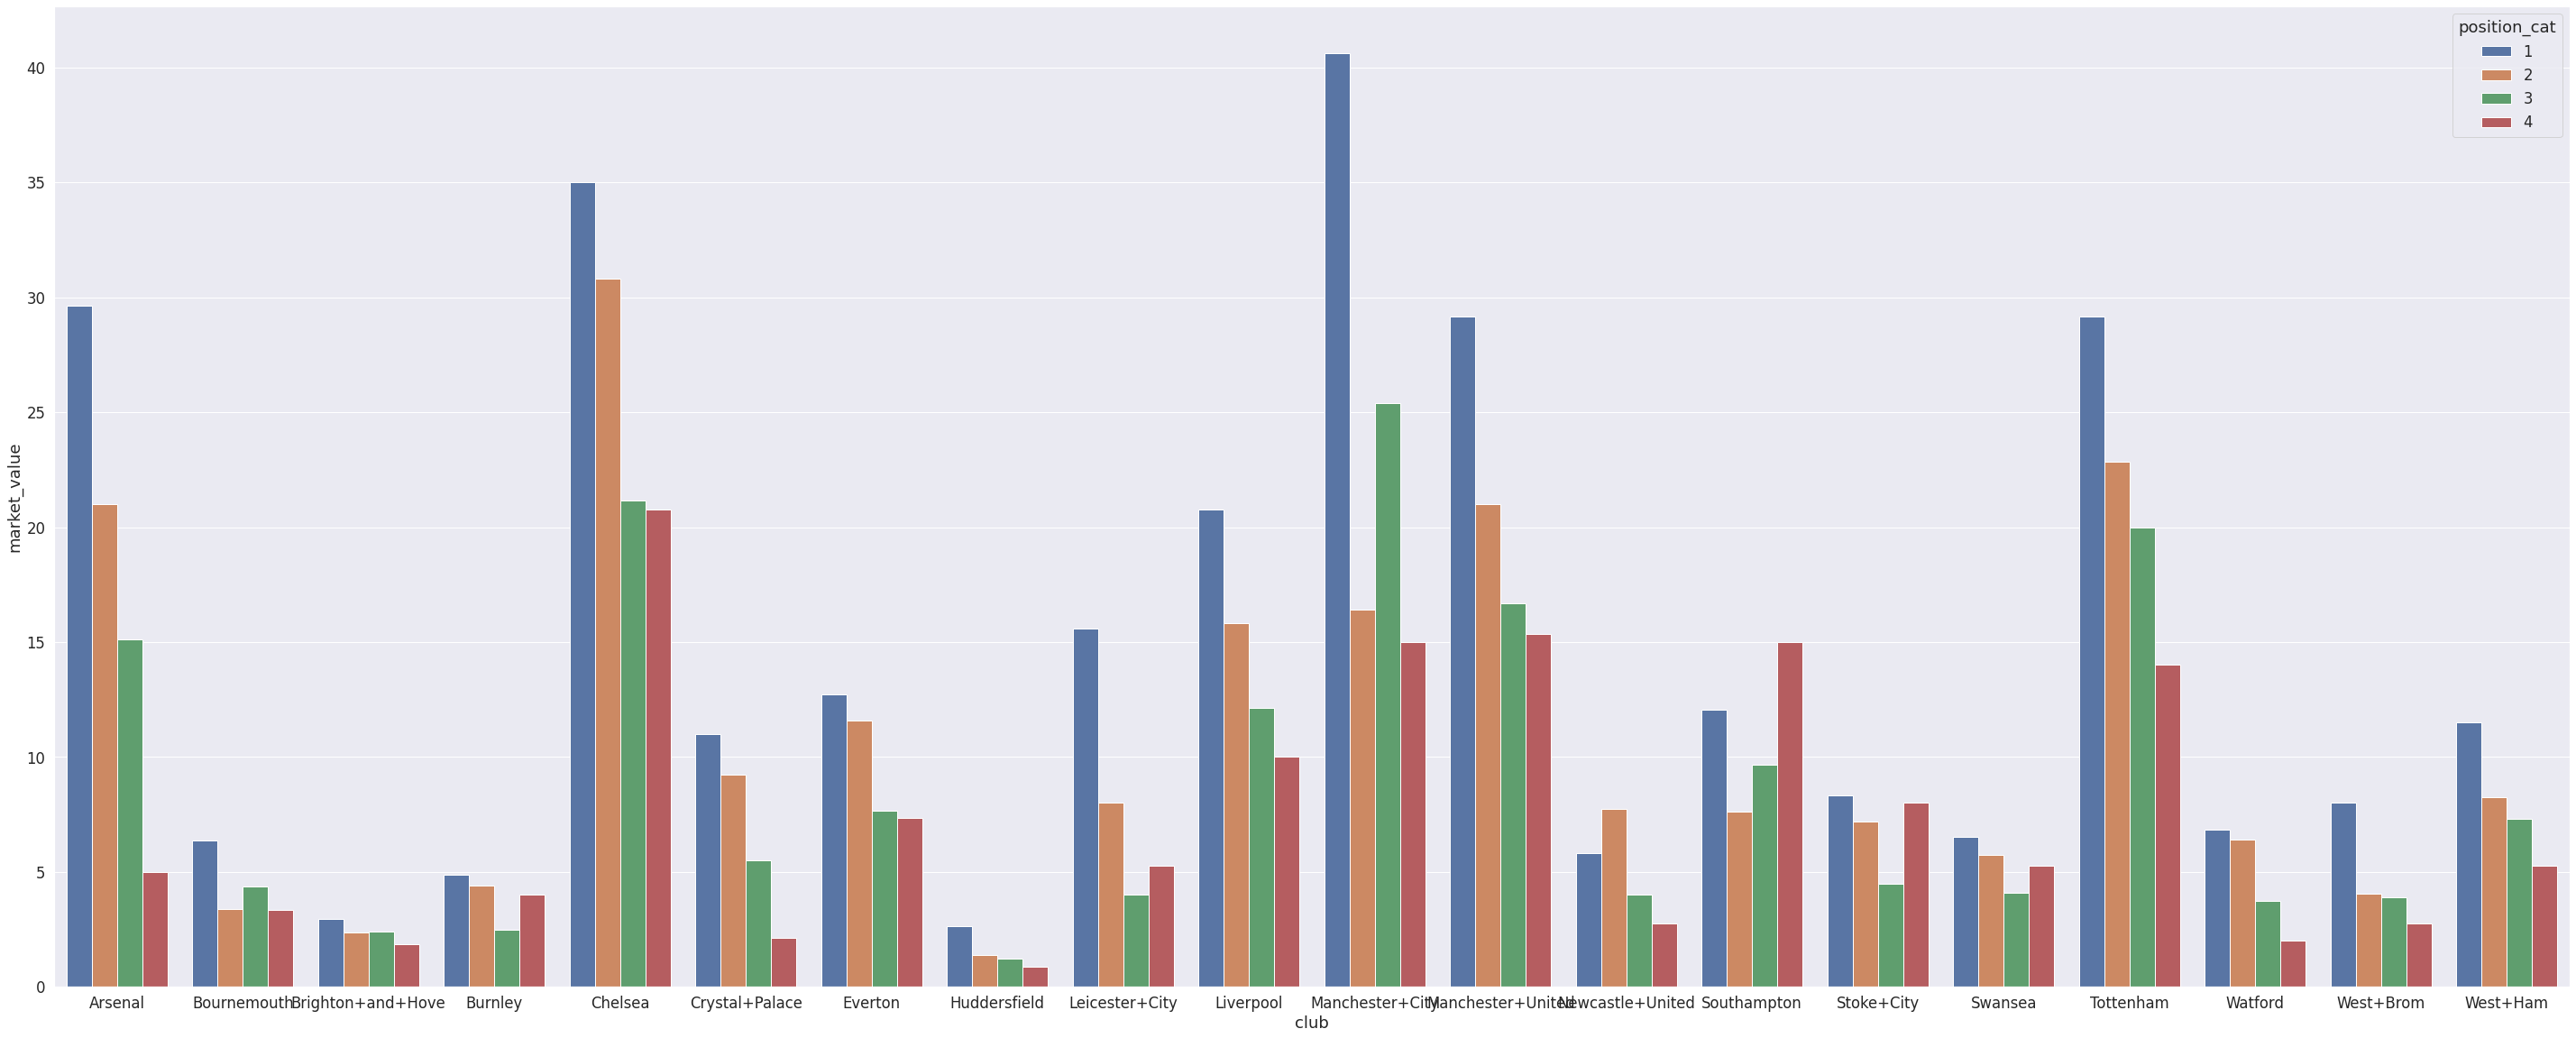

In [ ]:
sns.barplot(data=df_mini2,x='club',y='market_value',hue='position_cat')

In [ ]:
df_task1=train.loc[:,['club','page_views']]

In [ ]:
df_task1

,club,page_views
0,Arsenal,4329
1,Arsenal,4395
2,Arsenal,1529
3,Arsenal,2393
4,Arsenal,912
...,...,...
456,West+Ham,288
457,West+Ham,199
458,West+Ham,198
459,West+Ham,412


In [ ]:
grouped_df=df_task1.groupby('club')
grouped_mean=grouped_df.mean()
grouped_mean=grouped_mean.reset_index()

In [ ]:
grouped_mean

,club,page_views
0,Arsenal,1402.785714
1,Bournemouth,508.458333
2,Brighton+and+Hove,198.272727
3,Burnley,287.833333
4,Chelsea,1773.800000
5,Crystal+Palace,455.428571
6,Everton,908.785714
7,Huddersfield,139.785714
8,Leicester+City,712.750000
9,Liverpool,1195.296296


In [ ]:
grouped_mean.sort_values('page_views',axis=0,na_position='last',inplace=True,ascending=False)

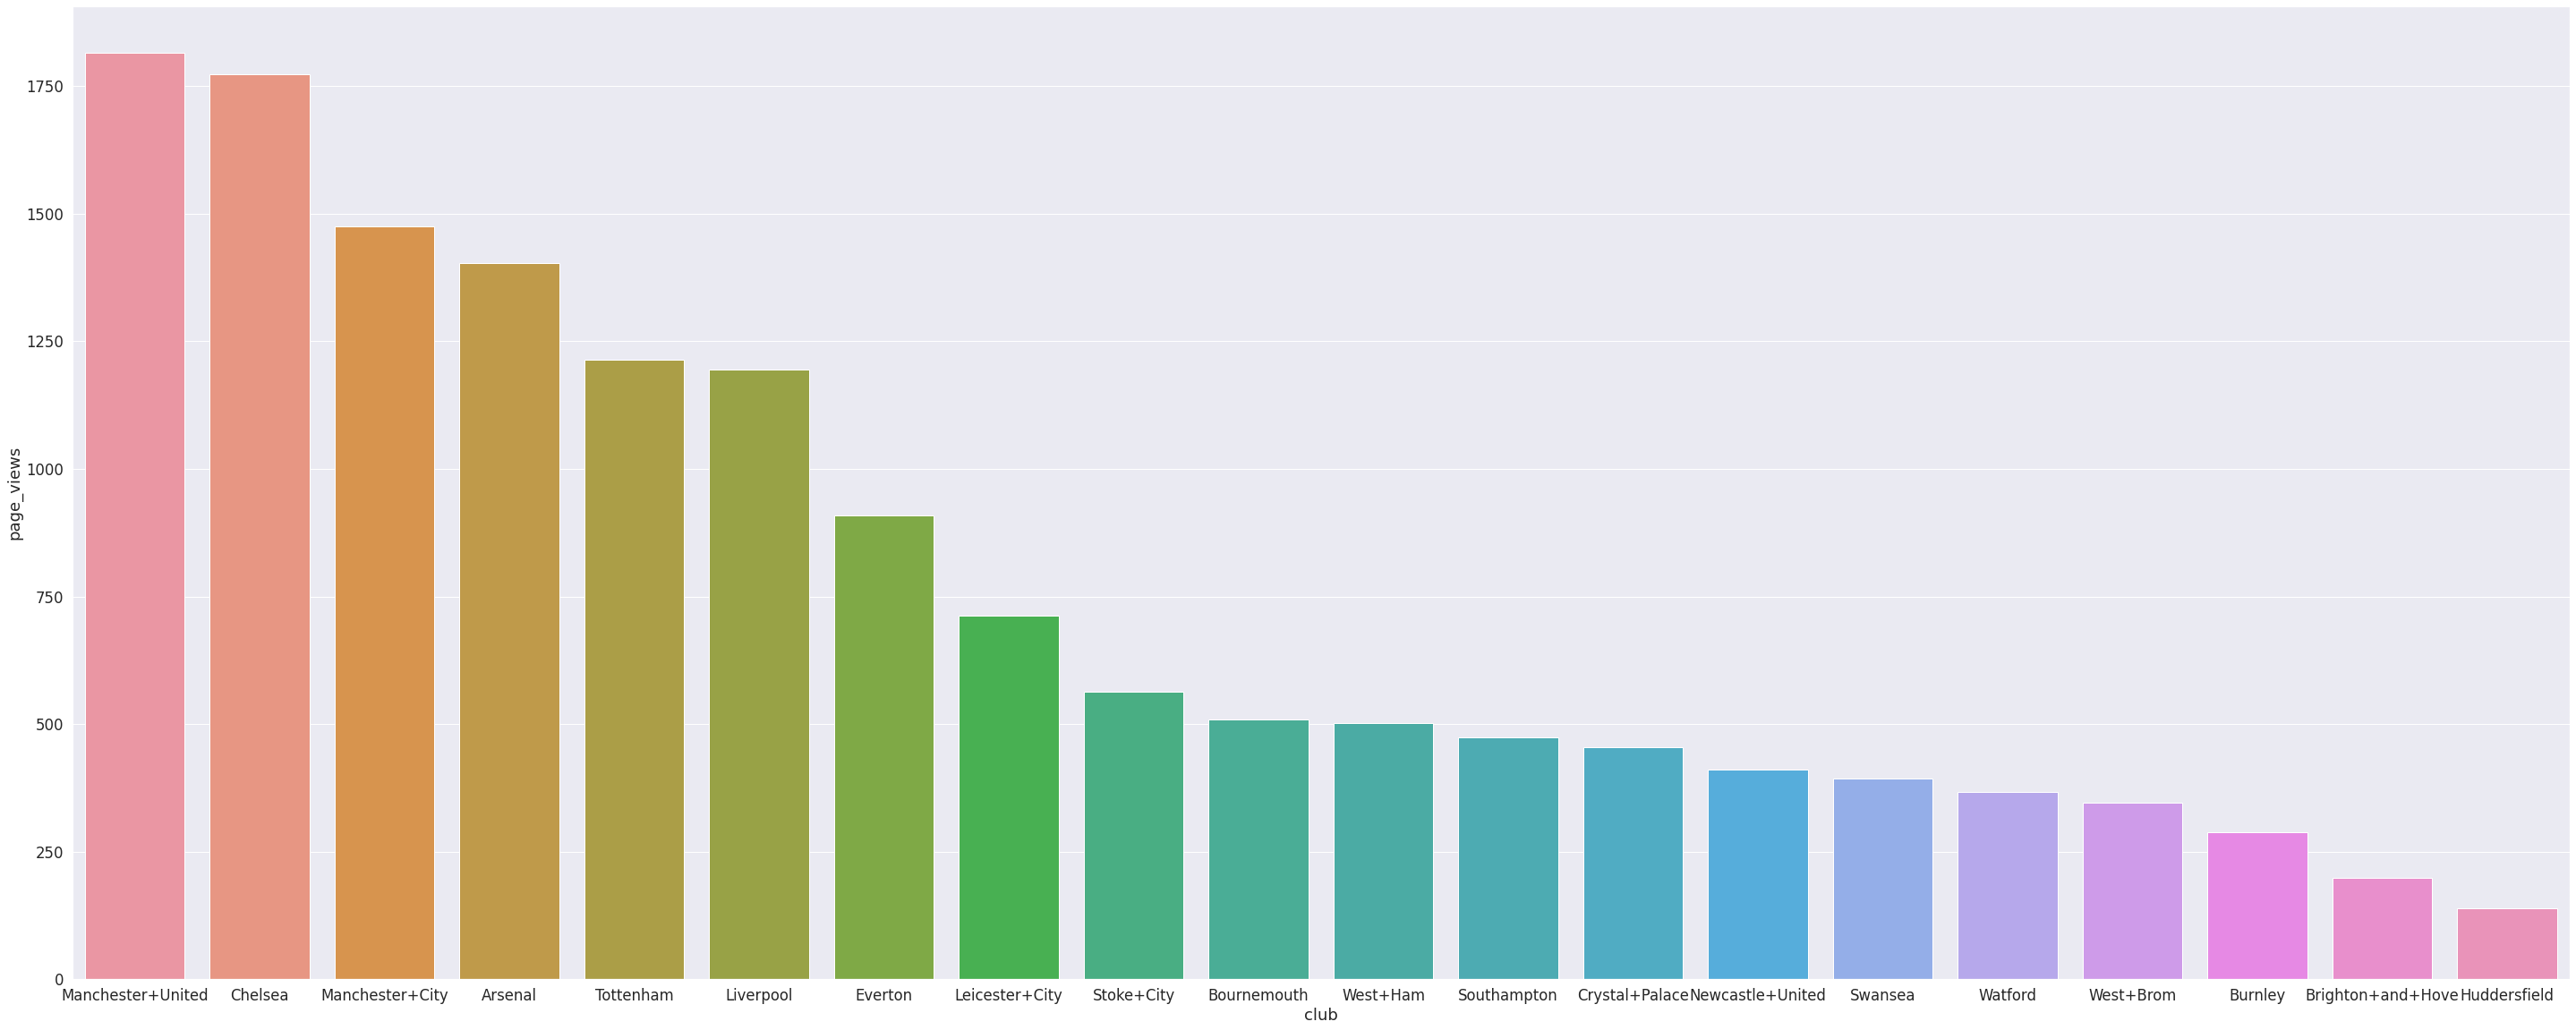

In [ ]:
sns.barplot(data=grouped_mean,x='club',y='page_views')

In [ ]:
df_task2=train.loc[:,['club','market_value']]

In [ ]:
df_task2

,club,market_value
0,Arsenal,65.0
1,Arsenal,50.0
2,Arsenal,7.0
3,Arsenal,20.0
4,Arsenal,22.0
...,...,...
456,West+Ham,5.0
457,West+Ham,7.0
458,West+Ham,4.5
459,West+Ham,1.0


In [ ]:
df_grouped2=df_task2.groupby('club')
df_mean=df_grouped2.mean()
df_mean=df_mean.reset_index()

In [ ]:
df_mean

,club,market_value
0,Arsenal,19.642857
1,Bournemouth,4.895833
2,Brighton+and+Hove,2.522727
3,Burnley,3.958333
4,Chelsea,27.677500
5,Crystal+Palace,7.726190
6,Everton,10.098214
7,Huddersfield,1.791071
8,Leicester+City,8.645833
9,Liverpool,16.314815


In [ ]:
df_mean.sort_values('market_value',axis=0,ascending=False,inplace=True,na_position='last')

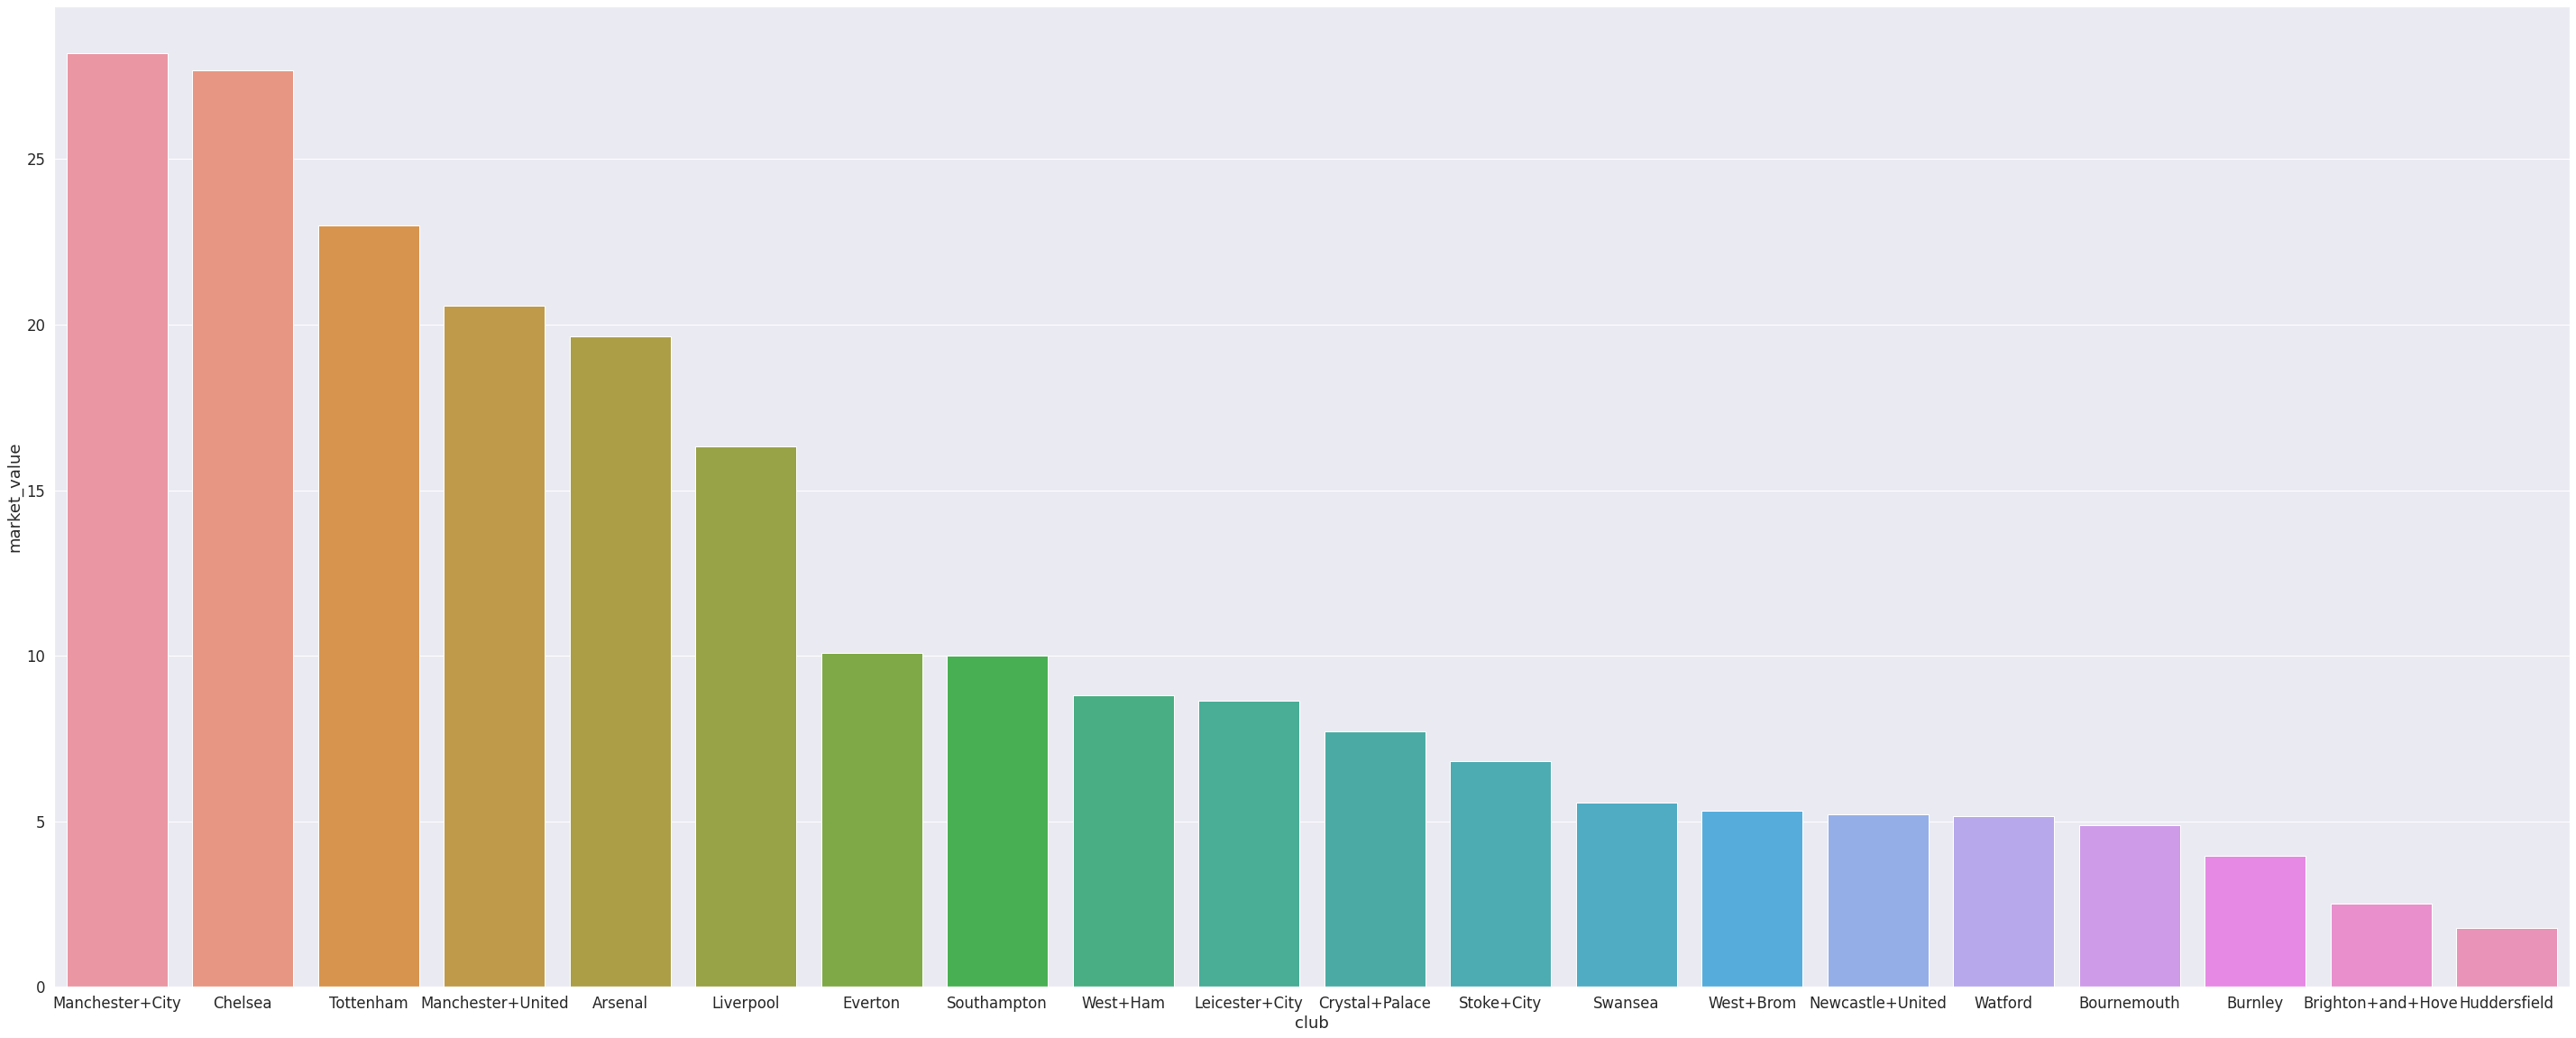

In [ ]:
sns.barplot(data=df_mean,x='club',y='market_value')

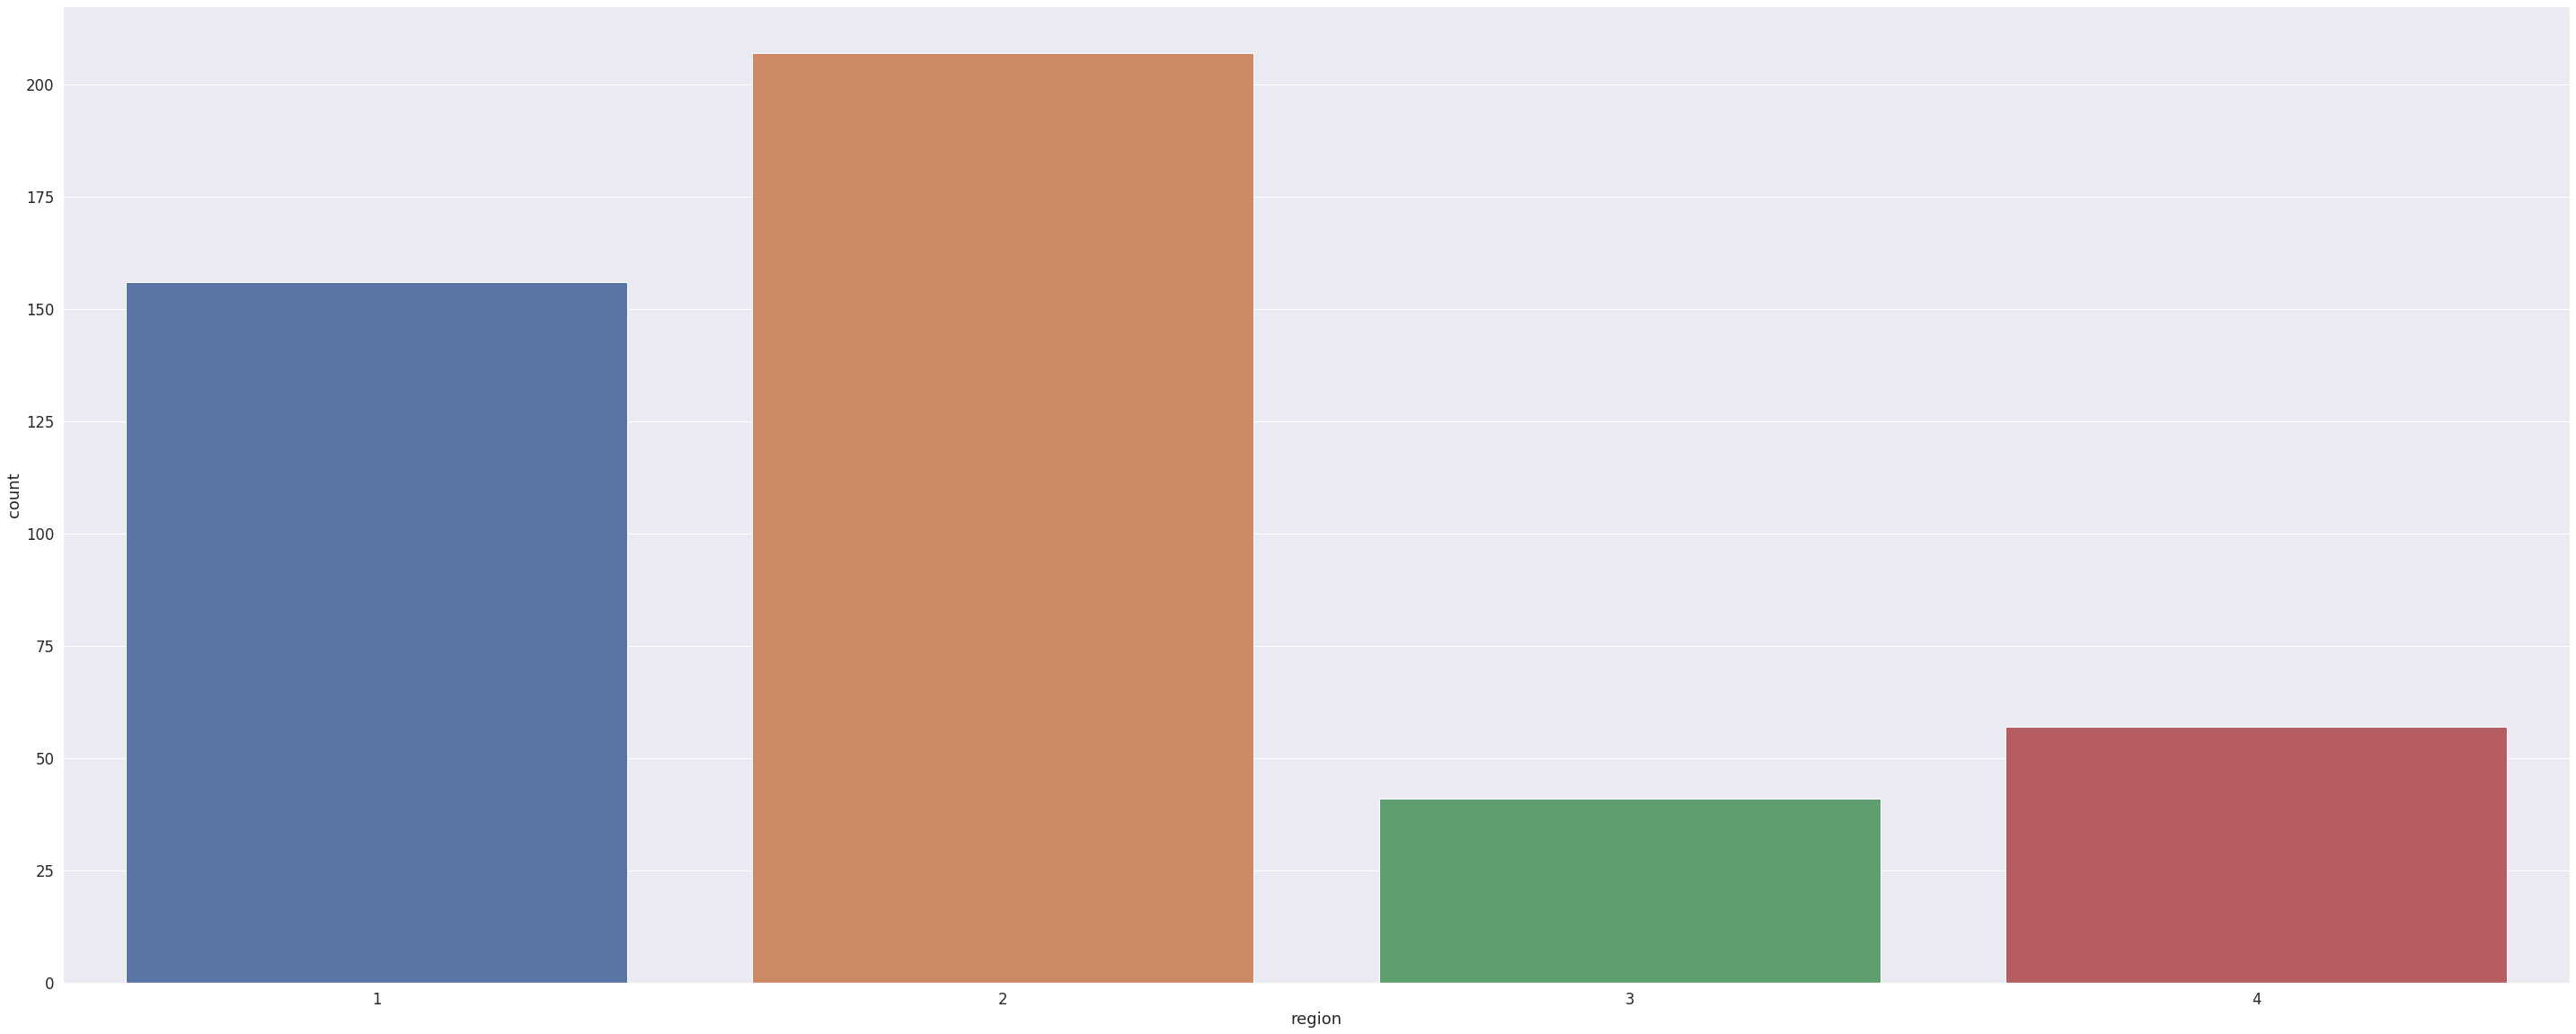

In [ ]:
sns.countplot(data=train,x='region')

In [ ]:
df_task4=train.loc[:,['region','market_value']]

In [ ]:
df_task4

,region,market_value
0,3,65.0
1,2,50.0
2,2,7.0
3,1,20.0
4,2,22.0
...,...,...
456,2,5.0
457,4,7.0
458,1,4.5
459,1,1.0


In [ ]:
grouped_4=df_task4.groupby('region')
mean_4=grouped_4.mean()
mean_4=mean_4.reset_index()

In [ ]:
mean_4

,region,market_value
0,1,8.482372
1,2,12.208454
2,3,14.704878
3,4,10.934211


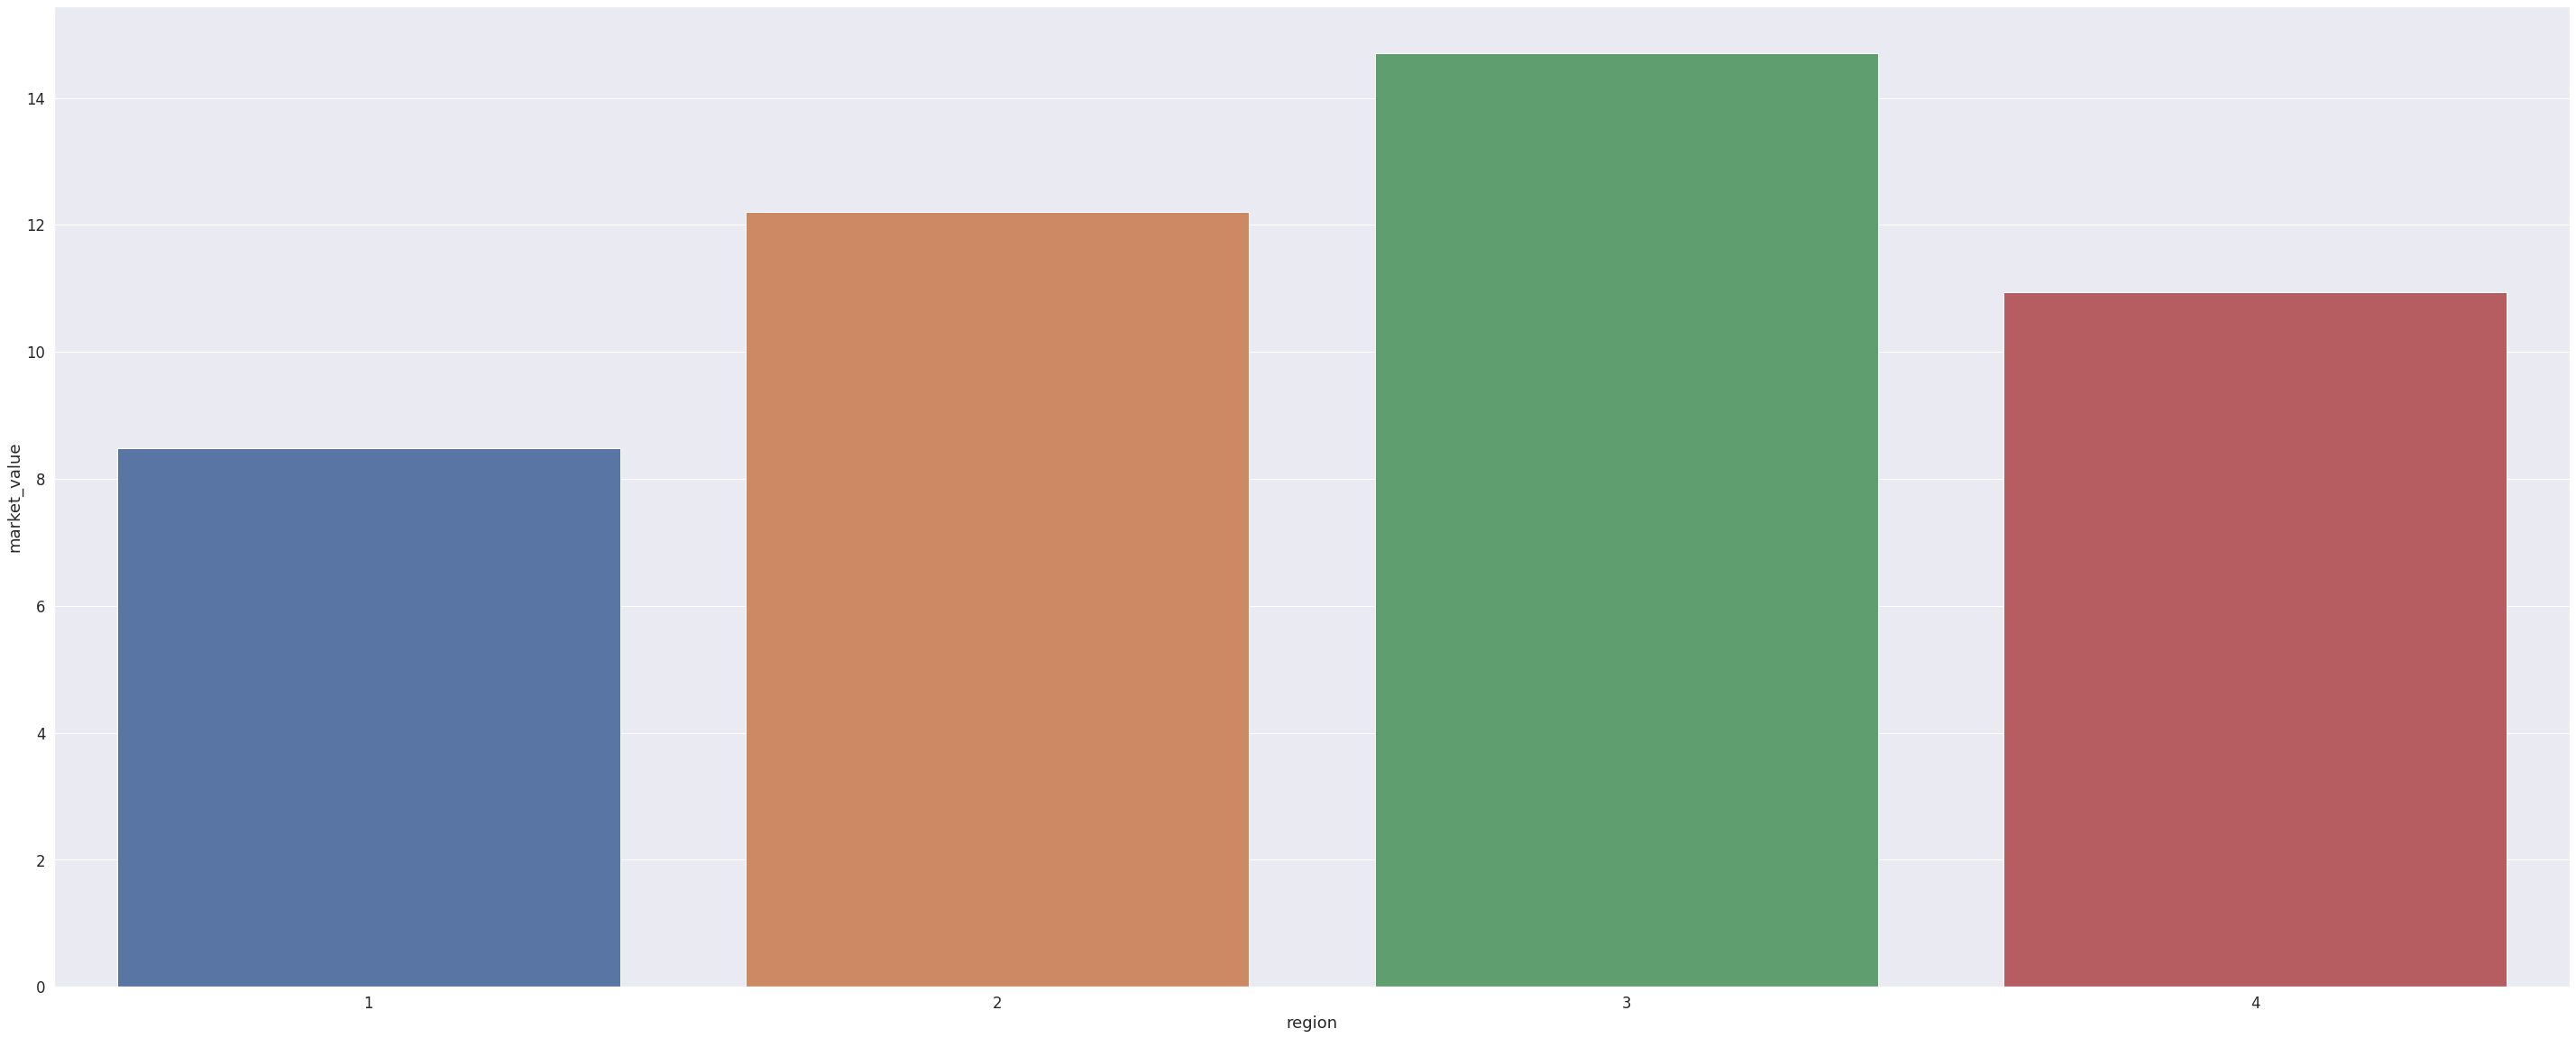

In [ ]:
sns.barplot(data=mean_4,x='region',y='market_value')

In [ ]:
train.head()

,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,Arsenal,28,LW,1,65.0,4329,12.0,264,3,Chile,0,4,1,1,0,17.1
1,Arsenal,28,AM,1,50.0,4395,9.5,167,2,Germany,0,4,1,1,0,5.6
2,Arsenal,35,GK,4,7.0,1529,5.5,134,2,Czech Republic,0,6,1,1,0,5.9
3,Arsenal,28,RW,1,20.0,2393,7.5,122,1,England,0,4,1,1,0,1.5
4,Arsenal,31,CB,3,22.0,912,6.0,121,2,France,0,4,1,1,0,0.7


In [ ]:
train.drop(['club'],axis=1,inplace=True)
train.head()

,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,28,LW,1,65.0,4329,12.0,264,3,Chile,0,4,1,1,0,17.1
1,28,AM,1,50.0,4395,9.5,167,2,Germany,0,4,1,1,0,5.6
2,35,GK,4,7.0,1529,5.5,134,2,Czech Republic,0,6,1,1,0,5.9
3,28,RW,1,20.0,2393,7.5,122,1,England,0,4,1,1,0,1.5
4,31,CB,3,22.0,912,6.0,121,2,France,0,4,1,1,0,0.7


In [ ]:
train.drop(['position'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,28,1,65.0,4329,12.0,264,3,Chile,0,4,1,1,0,17.1
1,28,1,50.0,4395,9.5,167,2,Germany,0,4,1,1,0,5.6
2,35,4,7.0,1529,5.5,134,2,Czech Republic,0,6,1,1,0,5.9
3,28,1,20.0,2393,7.5,122,1,England,0,4,1,1,0,1.5
4,31,3,22.0,912,6.0,121,2,France,0,4,1,1,0,0.7


In [ ]:
train.drop(['nationality'],axis=1,inplace=True)
train.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,FPL_SEL
0,28,1,65.0,4329,12.0,264,3,0,4,1,1,0,17.1
1,28,1,50.0,4395,9.5,167,2,0,4,1,1,0,5.6
2,35,4,7.0,1529,5.5,134,2,0,6,1,1,0,5.9
3,28,1,20.0,2393,7.5,122,1,0,4,1,1,0,1.5
4,31,3,22.0,912,6.0,121,2,0,4,1,1,0,0.7


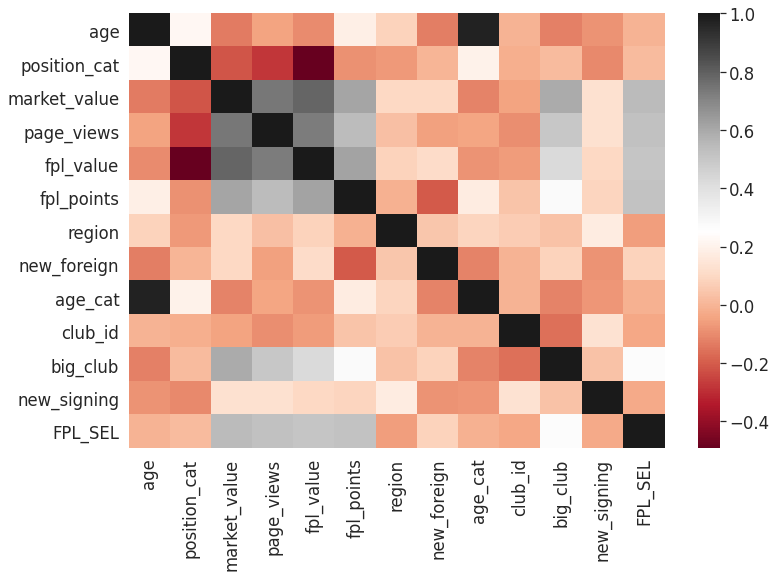

In [ ]:
plt.subplots(figsize=(12,8))
sns.heatmap(train.corr(), cmap = 'RdGy')

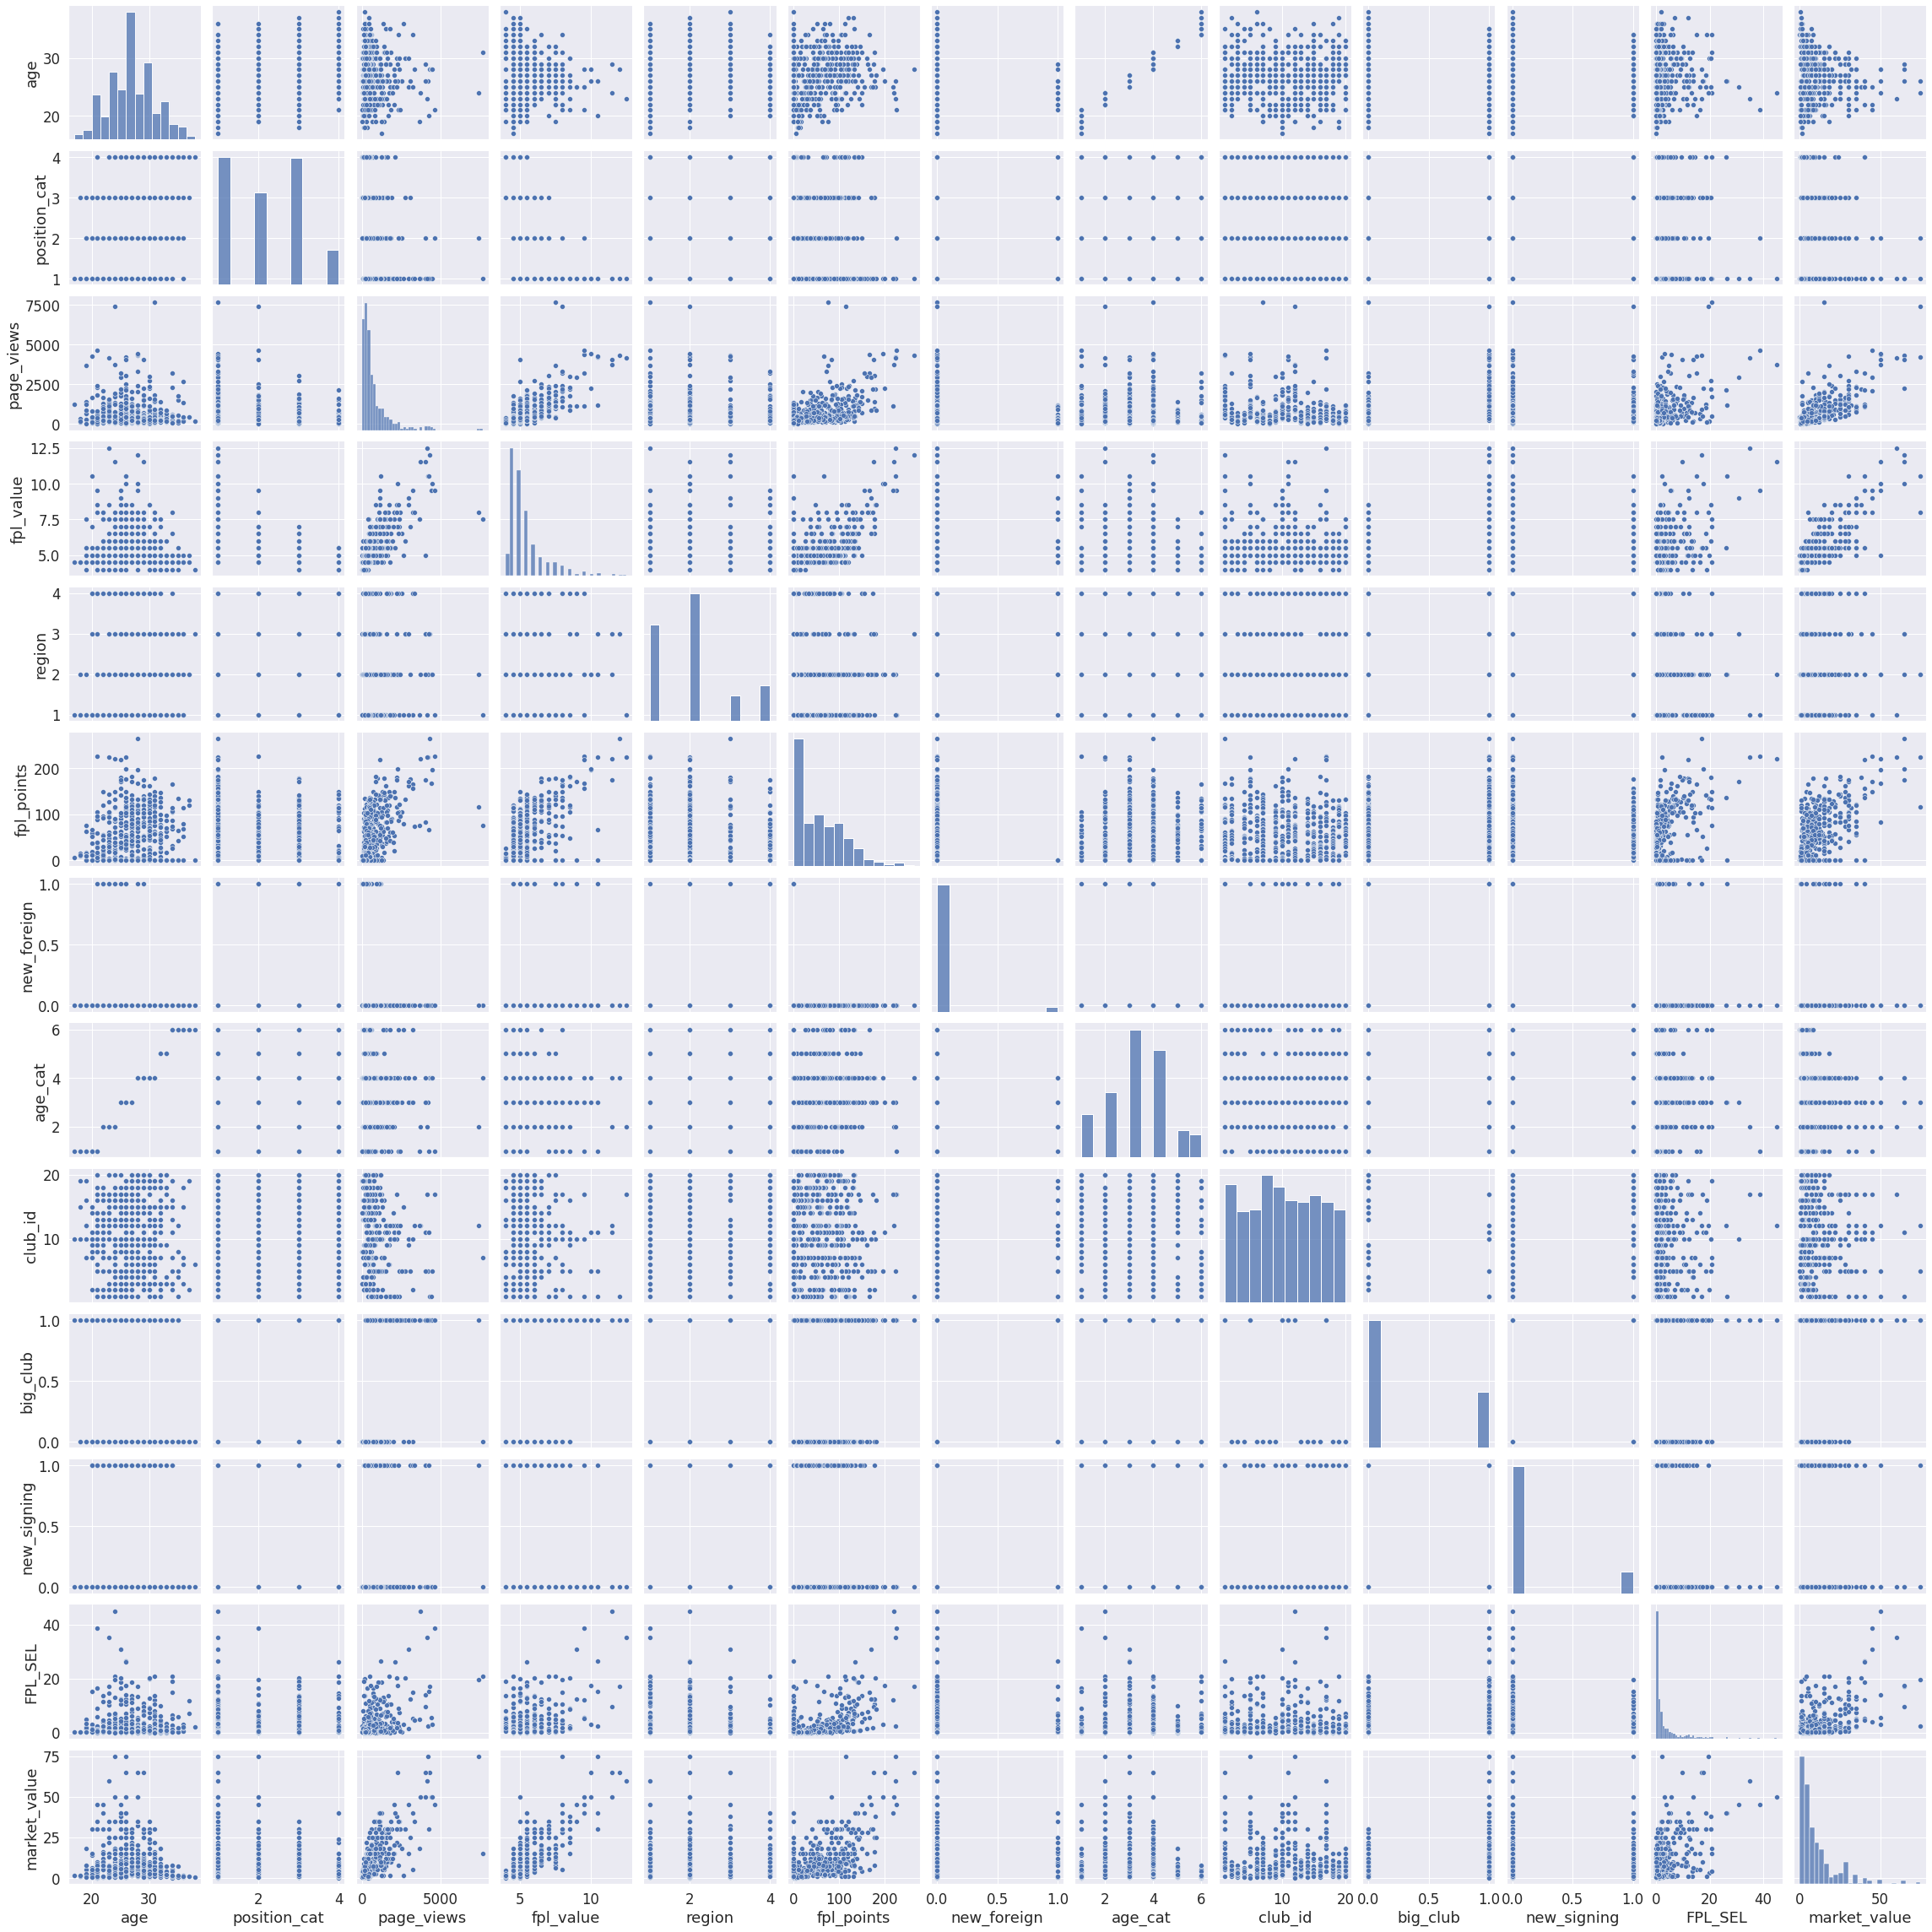

In [ ]:
sns.pairplot(train , vars = ['age','position_cat', 'page_views', 'fpl_value' ,'region' , 'fpl_points' , 'new_foreign','age_cat', 'club_id' ,'big_club' ,'new_signing' , 'FPL_SEL','market_value'])